<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Distance Metrics**


Estimated time needed: **45** minutes


## Use cases of Distance Metrics

*   **Classification**: KNN model uses a distance metric to find a data point's top k nearest neighbors.
*   **Clustering**: K-Means algorithm assigns data points to the nearest centroids using a distance metric.
*   **Natural Language Processing**: NLP uses the cosine similarity distance metric to filter out irrelevant documents from the corpus once the unstructured data is transformed into vector form.


## Why different distance metrics matter?

There are many ways to define the distance between two objects. To give you a real-life example, suppose you want to go from one city to another on a map, there will be at least two different distances. One is the driving distance and the other could be the flying distance. Depending on how you choose to travel, one of the distances could make completely no sense to you.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/distance.jpg" width=60%>

Image from [PxHere](https://pxhere.com/en/photo/718584?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)


Same idea applies to Machine Learning, choosing the correct distance metric is critical to the performance of the downstream task.

In this notebook, you will practice applying the distance metrics learned in this course. Using real-world data, you will analyze similarities and dissimilarities in data. You will also be able to understand how various algorithms such as DBSCAN are affected by different distance metrics.


## **Table of Contents**

<!-- <a href="#Principle-Component-Analysis">Principle Component Analysis</a> -->

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li><a href="https://#Datasets">Datasets</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="https://#Defining-helper-functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Euclidean-Distance">Euclidean Distance</a>
        <ol>
            <li><a href="https://#euclidean_GE">General Equation</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Manhattan-Distance">Manhattan Distance</a>
        <ol>
            <li><a href="https://#manhattan_GE">General Equation</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Cosine-Distance">Cosine Distance</a>
        <ol>
            <li><a href="https://#cosine_GE">General Equation</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Analyzing-Distance-Metrics-with-DBSCAN">Analyzing Distance Metrics with DBSCAN</a>
        <ol>
            <li><a href="https://#DBSCAN-using-Euclidean:">DBSCAN using Euclidean</a></li>
        </ol>
        <ol>
            <li><a href="https://#DBSCAN-using-Manhattan:">DBSCAN using Manhattan</a></li>
        </ol>
        <ol>
            <li><a href="https://#DBSCAN-using-Cosine:">DBSCAN using Cosine</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Jaccard-Distance">Jaccard Distance</a>
        <ol>
            <li><a href="https://#jaccard_GE">General Equation</a></li>
        </ol>
    </li>
</ol>

<a href="https://#Exercises">Exercises</a>

<ol>
    <li><a href="https://#Exercise-1---Jaccard-distance">Exercise 1 - Jaccard distance</a></li>
    <li><a href="https://#Exercise-2---Euclidean-distance-and-manhattan-distance">Exercise 2 - Euclidean distance and manhattan distance</a></li>
    <li><a href="https://#Exercise-3---Cosine-distance">Exercise 3 - Cosine Distance</a></li>
    <li><a href="https://#Exercise-4---Using-sklearn.metrics.pairwise">Exercise 4 - Using <code>sklearn.metrics.pairwise</code></a></li>
</ol>


***


## Objectives


After completing this lab you will be able to:


*   **Understand** the mathematics behind the euclidean, manhattan, cosine, and jaccard distance metrics.
*   **Understand** the use cases of the covered distance metrics.


## Datasets

Datasets for this lab are gathered from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) under the MIT License.


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for visualizing the data.
*   [`scipy`](https://docs.scipy.org/doc/scipy/reference/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for complex numerical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
 # All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!mamba install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scipy==1.7.3
!mamba install -qy scikit-learn==1.0.2
# Note: If your environment doesn't support "!mamba install", use "!pip install pandas==1.3.4 ... "

  Package               Version  Build           Channel                  Size
────────────────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────────────────────────────────────────

  + joblib                1.1.1  py37h06a4308_0  pkgs/main/linux-64     379 KB
  + scikit-learn          1.0.2  py37h51133e4_1  pkgs/main/linux-64       5 MB
  + threadpoolctl         2.2.0  pyh0d69192_0    pkgs/main/noarch        16 KB

  Upgrade:
────────────────────────────────────────────────────────────────────────────────

  - ca-certificates   2022.9.24  ha878542_0      installed                    
  + ca-certificates  2023.01.10  h06a4308_0      pkgs/main/linux-64     120 KB
  - certifi           2022.9.24  pyhd8ed1ab_0    installed                    
  + certifi           2022.12.7  py37h06a4308_0  pkgs/main/linux-64     150 KB
  - openssl              1.1.1s  h0b41bf4_1      installed                    
  + openssl          

Run the following cell to ensure you are using the correct version of sklearn:


In [2]:
import sklearn
if sklearn.__version__ != "1.0.2":
    raise ValueError("Please install sklearn==1.0.2 so this lab works properly")

### Importing Required Libraries


In [3]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import scipy
from scipy.spatial.distance import euclidean, cityblock, cosine
import sklearn.metrics.pairwise

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt

# Make matplotlib work in jupyter notebook
%matplotlib inline

### Defining Helper Functions

In the section below, we will define helper functions that will help analyze different distance metrics

**Average Distance**

This function will return the average distance between two sets of data given our provided distance metric, i.e., each point in $X$ with each other point in $Y$. Refer to the image below:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/avg_distance.png" width=30% height=auto/>


In [4]:
# This function will allow us to find the average distance between two sets of data
def avg_distance(X1, X2, distance_func):
    from sklearn.metrics import jaccard_score
    #print(distance_func)
    res = 0
    for x1 in X1:
        for x2 in X2:
            if distance_func == jaccard_score: # the jaccard_score function only returns jaccard_similarity
                res += 1 - distance_func(x1, x2)
            else:
                res += distance_func(x1, x2)
    return res / (len(X1) * len(X2))

**Pairwise Distance**

This function will return the average pairwise distance between two sets of data. The distance for each row in $X$ from the corresponding row in $Y$. The number of rows of in the two sets of data should be equal. Refer to the image below:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/pairwise_distance.png" width=30% height=auto />


In [5]:
# This function will allow us to find the average pairwise distance
def avg_pairwise_distance(X1, X2, distance_func):
    return sum(map(distance_func, X1, X2)) / min(len(X1), len(X2))

## Load the datafile into `pandas.DataFrame`

Before working with the data, it must be loaded into a `pandas.DataFrame`:


In [6]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


For the purpose of this lab, we will not be using the `"petal_width"` column:


In [7]:
df.drop(['petal_width'], axis=1, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.7,3.2,1.3,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


Let's see what the different `"species"` types are in the dataset:


In [8]:
species = df['species'].unique()
print(species)

['setosa' 'versicolor' 'virginica']


Let's view the three species of irises' data in 3D using `matplotlib`


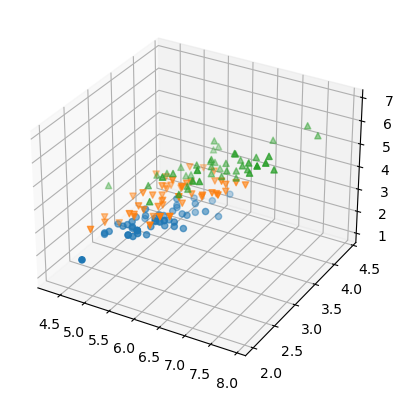

In [9]:
attrs = ['sepal_length', 'sepal_width', 'petal_length']
markers = ['o', 'v', '^']
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for specie, marker in zip(species, markers):
    specie_data = df.loc[df['species'] == specie][attrs]
    xs, ys, zs = [specie_data[attr] for attr in attrs]
    ax.scatter(xs, ys, zs, marker=marker)
plt.show()

Create variables for the species' data, as `np.ndarray`s:


In [10]:
setosa_data = df.loc[df['species'] == 'setosa'][attrs].to_numpy()
versicolor_data = df.loc[df['species'] == 'versicolor'][attrs].to_numpy()
virginica_data = df.loc[df['species'] == 'virginica'][attrs].to_numpy()

In a the NumPy array, each point is a row and  each column is a dimension, we can see this by using <code>shape</code>:


In [11]:
setosa_data.shape

(50, 3)

## Euclidean Distance

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/euclidean.png" width=30% height=auto/>


In this task, you will learn and practice applying Euclidean distance.

Euclidean distance is simply the physical distance between two points.

*Euclidean distance is useful when physical distance matters most.*

We know from high school math the distance between two points **on a plane (2D)** $(x\_1, y\_1), (x\_2, y\_2)$ is:

$\sqrt{(x\_2-x\_1)^2 + (y\_2-y\_1)^2}$

The distance between two points in **3D** $(x\_1, y\_1, z\_1), (x\_2, y\_2, z\_2)$ is:

$\sqrt{(x\_2-x\_1)^2 + (y\_2-y\_1)^2 + (z\_2-z\_1)^2}$

### <a id='euclidean_GE'></a> General Equation

The **general equation for the euclidean distance** between two points in n-dimentions $\boldsymbol{a} = \[a\_1, a\_2, \dots, a_n], \boldsymbol{b}=\[b\_1, b\_2, \dots, b_n]$ is:

$$\sqrt{\sum\_{i=1}^{n} (b_i-a_i)^2}$$

Or for those inclined to Linear Algebra:

$$|| \boldsymbol{b} - \boldsymbol{a} ||$$


We can use the function `euclidean` from `scipy.spatial.distance` to compute the euclidean distance between two points.


In [12]:
euclidean([0, 0], [3, 4])

5.0

#### Let's find the average *euclidean* distance between the data of different species of irises

Average *euclidean* distance between **setosa** and **setosa**:


Average *euclidean* distance between **setosa** and **versicolor**:


In [13]:
avg_distance(setosa_data, versicolor_data, euclidean)

3.1110307382429827

Average *euclidean* distance between **setosa** and **virginica**:


In [57]:
avg_distance(setosa_data, virginica_data, euclidean)

4.470017704302476

We can also determine the  euclidean distances between two points using <code>paired_euclidean_distances</code> from <code>sklearn.metrics.pairwise</code>:


In [14]:
from sklearn.metrics.pairwise import paired_euclidean_distances

The input must be a numpy array where each point is a row:


In [15]:
X = np.array([[0, 0]], dtype=float)
Y = np.array([[3, 4]], dtype=float)
paired_euclidean_distances(X, Y).mean()

5.0

We apply our own version of the function


In [16]:
avg_pairwise_distance(X, Y, euclidean)

5.0

If we have 2 MxN arrays, where each row is one of M points and each column is N dimensions in two arrays:


In [17]:
M, N = setosa_data.shape
print(f'{M} points and each column is {N} dimensions')

50 points and each column is 3 dimensions


As above, we can calculate the distance between each array, then average the distance as follows.
First, we calculate the distance between each row:


In [18]:
row_dist=paired_euclidean_distances(setosa_data, versicolor_data)
row_dist

array([3.81968585, 3.44963766, 4.22018957, 2.77488739, 3.62353419,
       3.02324329, 3.71348893, 2.06155281, 3.88329757, 2.45153013,
       2.65518361, 2.85131549, 2.97321375, 4.02616443, 2.64764046,
       3.33166625, 3.33016516, 2.90172363, 3.26343377, 2.77488739,
       3.14642654, 2.83901391, 4.39431451, 3.20156212, 2.92745623,
       3.2249031 , 3.72021505, 3.84057287, 3.24037035, 2.22934968,
       2.41246762, 2.41867732, 2.84253408, 4.02367991, 3.04302481,
       3.45398321, 3.62767143, 3.318132  , 3.04630924, 2.68700577,
       3.26649659, 3.73363094, 3.1       , 2.0808652 , 2.59807621,
       2.94108823, 2.81602557, 3.32565783, 1.93132079, 2.83372546])

Then, we find the average value:


In [19]:
row_dist.mean()

3.1208199582684055

We repeat the process:


In [20]:
paired_euclidean_distances(setosa_data, virginica_data).mean()

4.467297089536804

Now, applying our own function:


In [21]:
avg_pairwise_distance(setosa_data, virginica_data, euclidean)

4.467297089536803

## Manhattan Distance

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/manhattan.png" width=30% height=auto/>


In this task, you will learn and practice applying Manhattan distance, sometimes called the  $L1$ norm and "cityblock" distance. The  Manhattan distance is even simpler than euclidean distance.

It can be described as the sum of the absolute value of the difference in each dimention of two points.

*Manhattan distance can be preferrable to euclidean distance in high-dimentional situations.*

The Manhattan distance between two points **on a plane (2D)** $(x\_1, y\_1), (x\_2, y\_2)$ is:

$|x\_2 - x\_1| + |y\_2-y\_1|$

### <a id='manhattan_GE'></a> General Equation

The **general equation for the manhattan distance** between two points in N-dimentions $\boldsymbol{a}=\[a\_1, a\_2, \dots, a_n], \boldsymbol{b}=\[b\_1, b\_2, \dots, b_n]$ is:

$$ \sum\_{i=1}^{n} |b_i-a_i| $$


We can use the function `cityblock` from `scipy.spatial.distance` to compute the manhattan distance between two points.


In [22]:
cityblock([1, 1], [-2, 2])

4

#### Let's find the average *manhattan* distance between the data of different species of irises

Average *manhattan* distance between **setosa** and **setosa**:


In [23]:
avg_distance(setosa_data, setosa_data, cityblock)

0.9921600000000026

Average *manhattan* distance between **setosa** and **versicolor**:


In [24]:
avg_distance(setosa_data, versicolor_data, cityblock)

4.439119999999999

Average *manhattan* distance between **setosa** and **virginica**:


In [25]:
avg_distance(setosa_data, virginica_data, cityblock)

6.219039999999988

We can also determine the pairwise Manhattan Distances between two points using <code>manhattan_distances</code> from <code>sklearn.metrics.pairwise</code>:


In [26]:
from sklearn.metrics.pairwise import manhattan_distances

In [27]:
X = np.array([[1, 1]])

Y = np.array([[-2, 2]])

In [28]:
manhattan_distances(X, Y)

array([[4.]])

## Cosine Distance

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/cosine.png" width=30% height=auto/>


In this task, you will learn and practice applying Cosine distance.

The cosine distance between two points can be thought of as one minus the cosine of the angle between them with respect to the origin.

As such, it has a value in the range $\[0, 2]$ where:

*   $0$ means "in the same direction"
*   $1$ means "perpendicular"
*   $2$ means "in the opposite direction."

So, **the lower the cosine distance, the more-similar two points are (in direction)**.

*Cosine distance is useful when "direction" matters more than euclidean distance*

The cosine distance between two points **on a plane (2D)** $(x\_1, y\_1), (x\_2, y\_2)$ is:

$$1 - \frac{x\_1 \cdot x\_2 + y\_1 \cdot y\_2}{\sqrt{x\_1^2 + y\_1^2} + \sqrt{x\_2^2 + y\_2^2}}$$

### <a id='cosine_GE'></a> General Equation

The **general equation for the cosine distance** between two points in N-dimentions $\boldsymbol{a} = \[a\_1, a\_2, \dots, a_n], \boldsymbol{b} = \[b\_1, b\_2, \dots, b_n]$ is:

$$1 - \frac{\sum\_{i=1}^{n} a_i \cdot b_i}{\sqrt{\sum\_{i=1}^{n} a_i^2} + \sqrt{\sum\_{i=1}^{n} b_i^2}}$$

Or for those inclined to linear algebra:

$$1 - \frac{\boldsymbol{a} \cdot \boldsymbol{b}}{||\boldsymbol{a}|| \cdot ||\boldsymbol{b}||}$$


We can use the function `cosine` from `scipy.spatial.distance` to compute the cosine distance between two points.


In [29]:
cosine([1, 1], [-1, -1])

2.0

For this exercise, we will use a different dataset.

Download the dataset `"auto-mpg.data"`, which contains information about cars from 1970 to 1982:


In [30]:
df = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/auto-mpg.data',
    header=None, delim_whitespace=True,
    names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


For this example we are only using the `"mpg"` and `"weight"` features:


In [31]:
df['car_name'] = df['car_name'].str.split(n=1).apply(lambda lst: lst[0]).replace('chevrolet', 'chevy')
df.rename(columns={'car_name': 'make'}, inplace=True)
df = df[['mpg', 'weight', 'make']]
df.head()

,mpg,weight,make
0,18.0,3504.0,chevy
1,15.0,3693.0,buick
2,18.0,3436.0,plymouth
3,16.0,3433.0,amc
4,17.0,3449.0,ford


**Normalize** the numerical data (important for cosine distance if you want features to have "equal weight")


In [32]:
dfn = df[['mpg', 'weight']]
df[['mpg', 'weight']] = (dfn-dfn.min())/(dfn.max()-dfn.min())
df.head()

,mpg,weight,make
0,0.239362,0.536150,chevy
1,0.159574,0.589736,buick
2,0.239362,0.516870,plymouth
3,0.186170,0.516019,amc
4,0.212766,0.520556,ford


Let's use *cosine* distance to compare chevy and honda makes from 1970 to 1982:


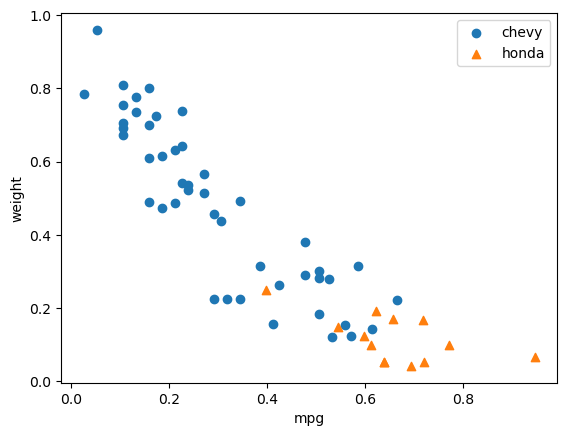

In [33]:
chevy = df.loc[df['make'] == 'chevy']
honda = df.loc[df['make'] == 'honda']

plt.scatter(chevy['mpg'], chevy['weight'], marker='o', label='chevy')
plt.scatter(honda['mpg'], honda['weight'], marker='^', label='honda')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

Now let's analyze the data using *cosine* distance.


In [34]:
chevy_data = chevy[['mpg', 'weight']].to_numpy()
honda_data = honda[['mpg', 'weight']].to_numpy()

The average *cosine* distance between **chevy** and **chevy** makes:


In [35]:
avg_distance(chevy_data, chevy_data, cosine)

0.1686029684688174

The average *cosine* distance between **honda** and **honda** makes:


In [36]:
avg_distance(honda_data, honda_data, cosine)

0.017557196207440316

The average *cosine* distance between **honda** and **chevy** makes:


In [37]:
avg_distance(honda_data, chevy_data, cosine)

0.3511900540950527

We can also determine the  pairwise cosine distance  between two points using <code>cosine_distances</code> from <code>sklearn.metrics.pairwise</code>:


In [38]:
from sklearn.metrics.pairwise import cosine_distances

In [39]:
X = np.array([[1, 1]])
Y = np.array([[-1, -1]])
cosine_distances(X, Y)

array([[2.]])

You can derive the cosine distance from the cosine similarity as follows

**cosine_distance = 1 - cosine_similarity**


In [40]:
from sklearn.metrics.pairwise import cosine_similarity
1-cosine_similarity(X,Y)

array([[2.]])

The average pairwise *cosine* distance between **chevy** and **chevy** makes:


In [41]:
cosine_distances(chevy_data, chevy_data).mean()

0.1686029684688178

between **honda** and **chevy** makes:


In [42]:
cosine_distances(honda_data, chevy_data).mean()

0.35119005409505294

## Analyzing Distance Metrics with DBSCAN

Now that we've learned various ***numerical*** distance metrics, let's see how they affect a clustering algorithm.

We begin by importing the `DBSCAN` object from `sklearn.neighbors` and downloading a synthetic dataset for clustering:


In [43]:
from sklearn.cluster import DBSCAN
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/synthetic_clustering.csv')
df.head()

,x,y
0,-0.285980,1.149042
1,-0.296288,1.204223
2,-1.157672,-1.406545
3,-0.653802,-0.993525
4,1.347072,1.329942


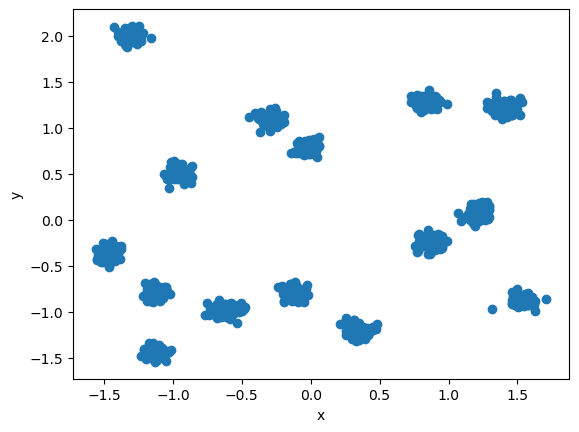

In [44]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### DBSCAN using Euclidean:


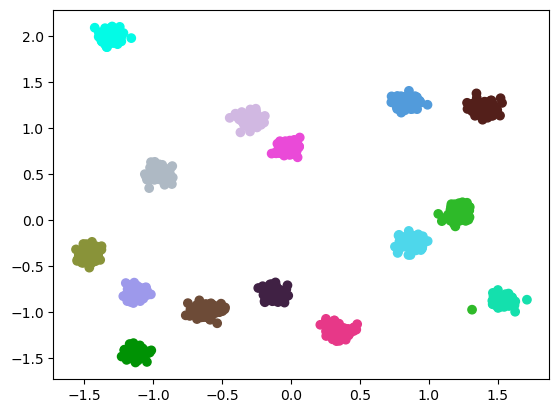

In [45]:
dbscan = DBSCAN(eps=0.1, metric=euclidean)
dbscan.fit(df)
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

#### DBSCAN using Manhattan:


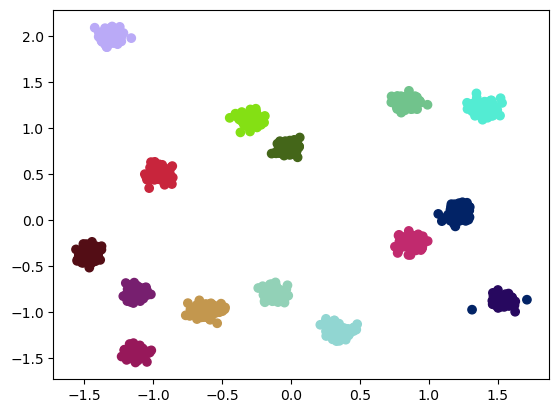

In [46]:
dbscan = DBSCAN(eps=0.1, metric=cityblock)
dbscan.fit(df)
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

#### DBSCAN using Cosine:


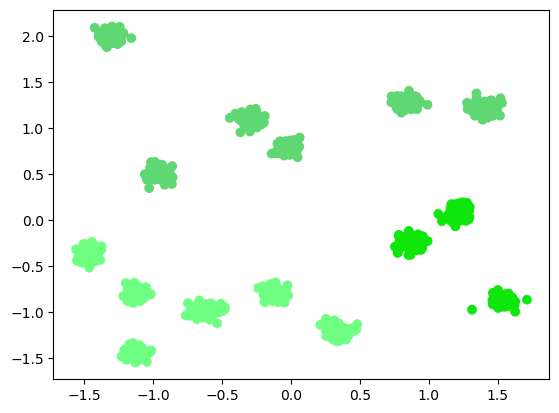

In [47]:
dbscan = DBSCAN(eps=0.1, metric=cosine)
dbscan.fit(df)
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

Clearly, euclidean and manhattan distances have very similar results.

However, using cosine distance, DBSCAN groups points based on their angle, leading to unique results which is some cases may be very useful.


## Jaccard Distance


In this task, you will learn and practice applying Jaccard distance.

The Jaccard distance is used to compute the dissimilarity/distance of two sets of objects.

The Jaccard distance between two sets is a value in the range $\[0, 1]$ where:

*   $1$ means the two sets have nothing in common.
*   $0$ means the two sets are identical.

So **the greater the jaccard distance, the less similar the sets**.

*Jaccard distance is useful when comparing two sets of (usually) non-numerical objects*

### <a id='jaccard_GE'></a> General Equation

The **general equation for the jaccard distance** between two sets $A$ and $B$ is:

$$1 - \frac{|A \cap B|}{|A \cup B|}$$

*   $\cap$ means "set intersection"
*   $\cup$ means "union"
*   $| S |$ means the "length of set $S$"


We can use `sklearn.metrics.jaccard_score` to compute the jaccard distance between categorical data.

**NOTE**: `sklearn.metrics.jaccard_score` calculates the **jaccard similarity score**, which is **1 - jaccard distance**.


In [48]:
from sklearn.metrics import jaccard_score

For this exercise, we will use a different dataset.

Download the dataset `"breast-cancer.data"` which contains information about people diagnosed with breast cancer:


In [49]:
df = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/breast-cancer.data',
    header=None,
    names=['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'])
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


Lets look at the unique age groups in this dataset:


In [50]:
print(sorted(df['age'].unique()))
print(df.age.value_counts())

['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64


As you can see, the data values are **categorical** rather than real numerical values.

To obtain the **average jaccard distance** between two dataframes (**df1, df2**), we first need to convert the categorical variables into one-hot encoded (binary) variables. This allows us to easily compute the individual jaccard distance between each row in **df1** and other row in **df2**, since we could just view the rows as sets that contain 0's and 1's.

We can achieve this using the `OneHotEncoder` from `sklearn.preprocessing`:


In [51]:
from sklearn.preprocessing import OneHotEncoder

OH = OneHotEncoder()

In [52]:
X = OH.fit_transform(df.loc[:, df.columns != 'age']).toarray()
print(f"By using onehot encoding, we obtained a 2d array with shape {X.shape} that only has value 0 and 1 ")

By using onehot encoding, we obtained a 2d array with shape (286, 39) that only has value 0 and 1 


We will be analyzing the *Jaccard* distance of the set of people aged 30-39 and aged 60-69.


In [53]:
X30to39 = X[df[df.age == '30-39'].index]
X60to69 = X[df[df.age == '60-69'].index]

X30to39.shape, X60to69.shape

((36, 39), (57, 39))

Average Jaccard distance between people aged **30-39** and **30-39**:


In [54]:
avg_distance(X30to39, X30to39, jaccard_score)

0.6435631883548536

Average Jaccard distance between people aged **60-69** and **60-69**:


In [55]:
avg_distance(X60to69, X60to69, jaccard_score)

0.6182114564956281

Average Jaccard distance between people aged **30-39** and **60-69**:


In [56]:
avg_distance(X30to39, X60to69, jaccard_score)

0.7324778699972173

Therefore, it seems there are some disparate trends between the 30-39 and 60-69 age groups.


# Exercises


## Exercise 1 - Jaccard distance


In [59]:
# Find the jaccard distance between the words in the following two sentences:
sentence1 = 'Hello everyone and welcome to distance metrics'
sentence2 = 'Hello world and welcome to distance metrics'

In [62]:
s1set = set(sentence1.split())
s2set = set(sentence2.split())
ans = len(s1set.intersection(s2set)) / len(s1set.union(s2set))
ans

0.75

## Exercise 2 - Euclidean distance and manhattan distance


In [64]:
# Find the absolute value of the difference between the euclidean and manhattan distances of the two 3D points:
p1 = np.array([4, -3, 1])
p2 = np.array([-5, 1, -7])

In [65]:
import scipy.special
euclidean = scipy.spatial.distance.euclidean(p1, p2)
manhattan = scipy.spatial.distance.cityblock(p1, p2g)
ans = abs(manhattan - euclidean)
ans

8.31142245955048

## Exercise 3 - Cosine distance


In [67]:
# Find the cosine distance between the following two points:
p1 = np.array([1, 2, 3]).reshape(1, -1)
p2 = np.array([-2, -4, -6]).reshape(1, -1)

In [68]:
ans = cosine_distances(p1, p2)
ans

array([[2.]])

## Exercise 4 - Using `sklearn.metrics.pairwise`


Use:

*   [`sklearn.metrics.pairwise.paired_euclidean_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.paired_euclidean_distances.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01#sklearn.metrics.pairwise.paired_euclidean_distances)
*   [`sklearn.metrics.pairwise.paired_manhattan_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.paired_manhattan_distances.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01#sklearn.metrics.pairwise.paired_manhattan_distances)

to find the **pairwise** distance between the following two datasets:


In [69]:
X1 = np.arange(8).reshape(4, 2)
X2 = np.arange(8)[::-1].reshape(4, 2)
print(f'X1:\n{X1}')
print(f'X2:\n{X2}')

X1:
[[0 1]
 [2 3]
 [4 5]
 [6 7]]
X2:
[[7 6]
 [5 4]
 [3 2]
 [1 0]]


In [70]:
paired_euclidean = sklearn.metrics.pairwise.paired_euclidean_distances(X1, X2)
paired_manhattan = sklearn.metrics.pairwise.paired_manhattan_distances(X1, X2)

<details>
    <summary>Click here for Solution</summary>

```python
paired_euclidean = sklearn.metrics.pairwise.paired_euclidean_distances(X1, X2)
paired_manhattan = sklearn.metrics.pairwise.paired_manhattan_distances(X1, X2)
```

</details>


## Authors


[Sam Prokopchuk](https://www.linkedin.com/in/sam-prokopchuk-1908b21a0/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)


### Other Contributors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By     | Change Description          |
| ----------------- | ------- | -------------- | --------------------------- |
| 2021-12-20        | 0.1     | Sam Prokopchuk | Complete Exercises' content |
| 2022-05-24        | 0.1     | Roxanne Li     | Review and edit             |
| 2022-07-18        | 0.1     | Svitlana K     | Review and edit             |


Copyright © 2021 IBM Corporation. All rights reserved.
